In [20]:
import numpy as np
import cv2
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [27]:
dataset_path = "F:\\GTAV-Dataset"
dataset_timestamp = "2019_12_12_10_47_53"
camera = ""
#camera = "extra_cameras\\MVL"
frame = 2
aug = True

if aug:
    label_path = f"{dataset_path}\\{dataset_timestamp}\\{camera}\\label_aug_2\\{frame:06}.txt"
else:
    label_path = f"{dataset_path}\\{dataset_timestamp}\\{camera}\\label_2\\{frame:06}.txt"
    
img_path = f"{dataset_path}\\{dataset_timestamp}\\{camera}\\image_2\\{frame:06}.png"

df = pd.DataFrame()
try:
    df = pd.read_csv(label_path, delim_whitespace=True)
except pd.errors.EmptyDataError:
    print("No detections in file.")
    
if len(df) > 0:
    if aug:
        df.columns = ["objType", "truncation", "occlusion", "alpha", "b.left", "b.top", "b.right",
                      "b.bottom", "e.height", "e.width", "e.length", "e.location.x", "e.location.y",
                      "e.location.z", "e.rotation_y", "e.entityID", "e.pointsHit2D",
                      "e.pointsHit3D", "e.speed", "e.roll", "e.pitch", "e.modelString", "vPedIsIn"]
    else:
        df.columns = ["objType", "truncation", "occlusion", "alpha", "b.left", "b.top", "b.right",
                      "b.bottom", "e.height", "e.width", "e.length", "e.location.x", "e.location.y",
                      "e.location.z", "e.rotation_y"]

    #df = df[df["e.pointsHit2D"] > 10]
df

objType  truncation  occlusion     alpha  b.left  b.top  b.right  \
0          Car    0.000000   0.875000 -1.581480     858    531      858   
1          Car    0.000000   1.000000 -0.998733    1680   1050        0   
2          Car    0.000000   0.680000 -1.580600     859    530      864   
3          Car    0.000000   0.340299  0.238760     620    531      654   
4          Car    0.000000   1.000000  2.612610    1680   1050        0   
5          Car    0.000000   1.000000 -1.086010    1680   1050        0   
6          Car    0.000000   1.000000 -0.201354    1680   1050        0   
7          Car    0.000000   0.000000 -1.537680     834    532      849   
8          Car    0.000000   1.000000  2.263850    1680   1050        0   
9          Car    0.000000   0.000000  1.621690     794    529      804   
10         Car    0.000000   1.000000 -2.549870    1680   1050        0   
11         Car    0.000000   0.000000 -1.583670     860    531      866   
12         Car    0.000000   1.000000 -2.475640    1680   1050        0   
13         Car    0.000000   1.000000  2.246100    1680   1050        0   
14         Car    0.000000   0.000000  1.614170     808    529      815   
15         Car    0.000000   1.000000  3.480660    1680   1050        0   
16  Pedestrian    0.818234   0.000000 -0.258716      44    566       48   
17  Pedestrian    0.000000   0.626214  3.215030      80    533       90   
18  Pedestrian    0.000000   0.777616  0.928471      41    542       50   
19  Pedestrian    0.000000   0.479532 -3.329250    1020    526     1028   
20  Pedestrian    0.000000   0.788571 -2.329330     959    528      963   
21  Pedestrian    0.000000   0.995868  0.865605     951    528      951   
22  Pedestrian    0.000000   1.000000  0.742243    1680   1050        0   
23  Pedestrian    0.000000   0.000000  1.799880     599    534      605   
24  Pedestrian    0.000000   0.793103  1.394530     949    529      952   
25  Pedestrian    0.000000   0.000000  0.542145     625    533      632   
26  Pedestrian    0.000000   0.280000  2.083490     106    532      134   
27  Pedestrian    0.000000   0.809896  1.882040     483    531      492   
28  Pedestrian    0.000000   1.000000 -1.170700    1680   1050        0   
29  Pedestrian    0.000000   1.000000 -0.625662    1680   1050        0   
30  Pedestrian    0.000000   0.000000 -0.859165    1164    521     1176   
31  Pedestrian    0.000000   1.000000  1.766070    1680   1050        0   
32  Pedestrian    0.000000   1.000000  1.111940    1680   1050        0   

    b.bottom  e.height  e.width    ...     e.location.z  e.rotation_y  \
0        533   1.49636  2.00041    ...       305.425000     -1.558990   
1          0   1.81193  2.04434    ...       202.284000     -0.317282   
2        533   1.35214  2.02399    ...       287.263000     -1.557400   
3        542   1.72352  2.11659    ...       134.818000      0.026324   
4          0   1.28737  2.12493    ...       161.587000      2.803640   
5          0   1.81193  2.04434    ...       241.492000     -1.541780   
6          0   1.66689  2.00030    ...       174.523000      0.334177   
7        541   1.35214  2.02399    ...       122.110000     -1.535420   
8          0   1.17153  2.01307    ...       176.854000      1.606000   
9        537   1.66689  2.00030    ...       185.500000      1.578190   
10         0   1.66689  2.00030    ...       152.118000     -3.115240   
11       534   1.18158  1.85965    ...       231.801000     -1.558150   
12         0   1.35214  2.02399    ...       154.860000     -1.820700   
13         0   1.49636  2.00041    ...       194.173000      2.823780   
14       534   1.81193  2.04434    ...       245.608000      1.584110   
15         0   1.49636  2.00041    ...       200.332000      3.090440   
16       569   1.26334  1.20000    ...         0.080413     -1.570800   
17       573   1.85903  1.20000    ...        40.539700      2.532370   
18       565   1.05872  1.20000    ...        40.581400      0.220653

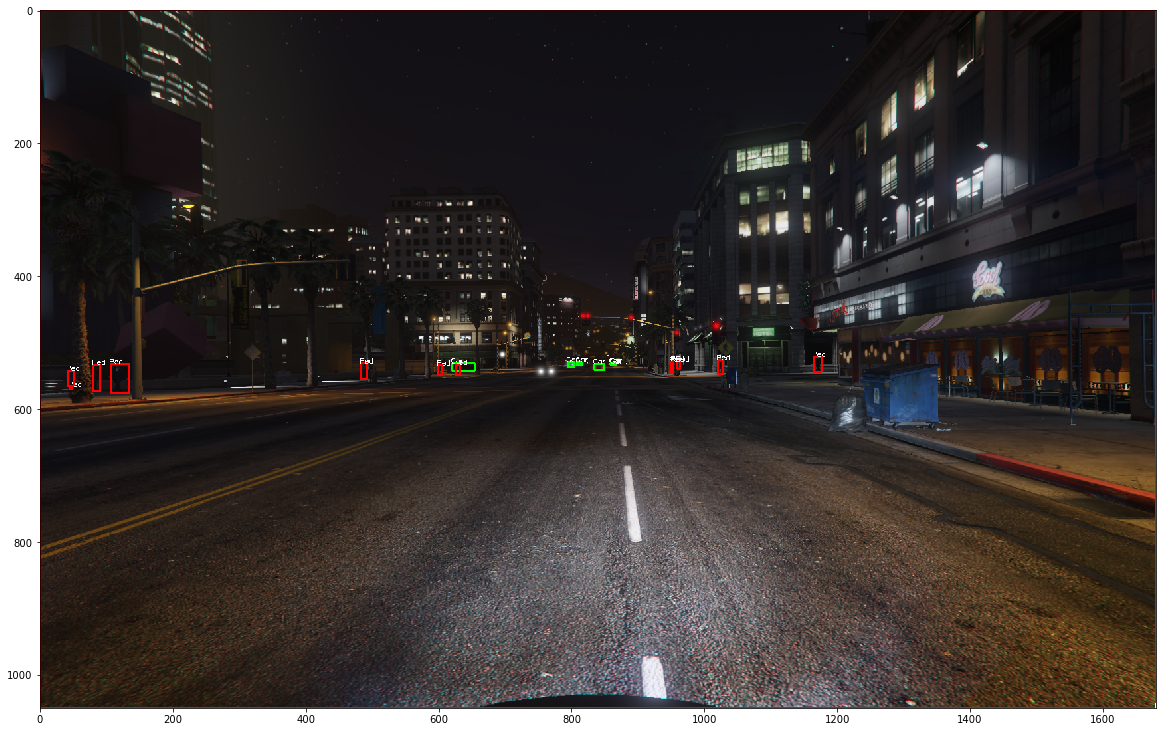

In [28]:
colors = {"Pedestrian": (0,0,255), "Car": (0,255,0)}

font                   = cv2.FONT_HERSHEY_SIMPLEX
fontScale              = 0.35
fontColor              = (255,255,255)
lineType               = 1

img = cv2.imread(img_path, 1)

for index, row in df.iterrows():
    object_name = row["objType"]
    start_point = (int(row["b.left"]), int(row["b.top"]))
    end_point = (int(row["b.right"]), int(row["b.bottom"]))
    color = colors.get(object_name, fontColor)

    img = cv2.rectangle(img, start_point, end_point, color, 2) 
    cv2.putText(img, object_name[:3], (row["b.left"]-2, row["b.top"]), font, fontScale, fontColor, lineType)

cv2.imwrite('bbox.jpg', img)
# cv2.imshow('image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

img_to_plot = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,16))
imgplot = plt.imshow(img_to_plot)